# Proyecto Final

### Integrantes:
* Daniel Cifuentes
* Andrea Rivas

In [61]:
# Librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Extra
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

In [62]:
data = pd.DataFrame(np.load('./data/proyecto_training_data.npy'), columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
data

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [63]:
# Separación de train (80%) y test (20%)
train, test = train_test_split(data, test_size = 0.2)

In [64]:
# Resumen 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


## 3. Análisis Exploratorio

In [65]:
# Media 
data.mean()

SalePrice       180921.195890
OverallQual          6.099315
1stFlrSF          1162.626712
TotRmsAbvGrd         6.517808
YearBuilt         1971.267808
LotFrontage         70.049958
dtype: float64

In [66]:
# Valores máximos
data.max()

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

In [67]:
# Valores mínimos
data.min()

SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64

In [68]:
# Rango

In [69]:
# Desviación estándar
data.std()

SalePrice       79442.502883
OverallQual         1.382997
1stFlrSF          386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64

## 4. Histogramas

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales Price', ylabel='Density'>

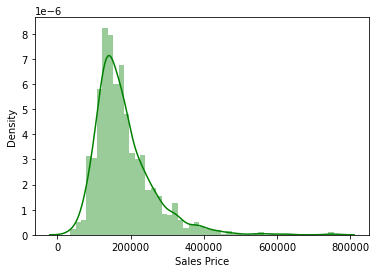

In [70]:
sns.distplot(data.SalePrice, color="g", axlabel= "Sales Price")

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Overall Quality', ylabel='Density'>

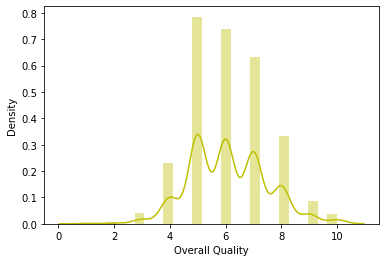

In [71]:
sns.distplot(data.OverallQual, axlabel= "Overall Quality", color= "y")

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='First Floor square feet', ylabel='Density'>

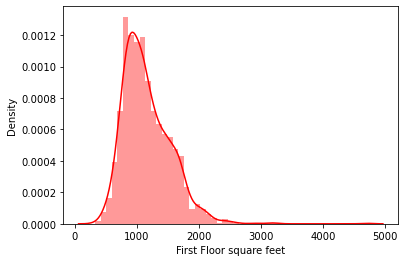

In [72]:
sns.distplot(data['1stFlrSF'], axlabel= "First Floor square feet", color="r")

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total rooms above grade', ylabel='Density'>

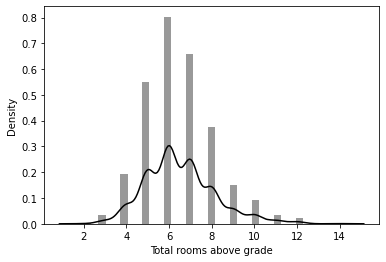

In [73]:
#olumns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
sns.distplot(data.TotRmsAbvGrd, axlabel= "Total rooms above grade", color="k")

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Original construction date', ylabel='Density'>

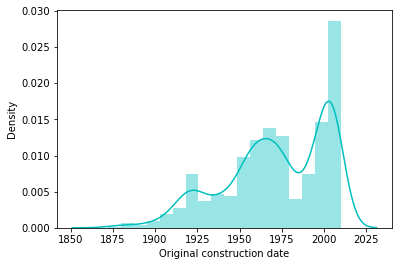

In [74]:
sns.distplot(data.YearBuilt, axlabel= "Original construction date", color="c")

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Linear feet of street connected to property', ylabel='Density'>

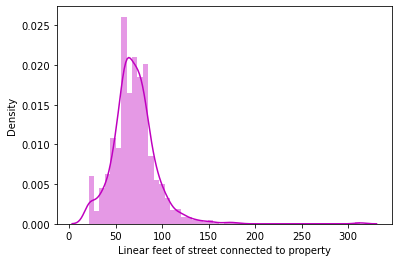

In [75]:
sns.distplot(data.LotFrontage, axlabel= "Linear feet of street connected to property", color="m")

## 5. Análisis de Selección de Variables

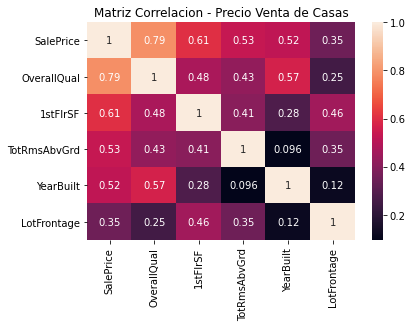

In [76]:
correlation_mat = data.corr()
correlation = sns.heatmap(correlation_mat, annot=True)
plt.title("Matriz Correlacion - Precio Venta de Casas")
plt.show()

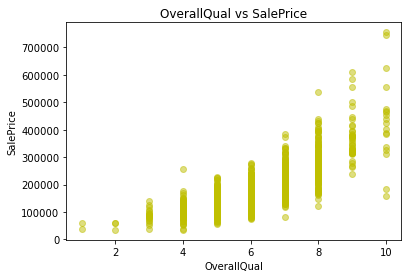

array([[1.       , 0.7909816],
       [0.7909816, 1.       ]])

In [77]:
qual_coef = np.corrcoef(data.OverallQual,data.SalePrice)
plt.scatter(data.OverallQual,data.SalePrice, c = "y", alpha = 0.5)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice')
plt.show()
qual_coef

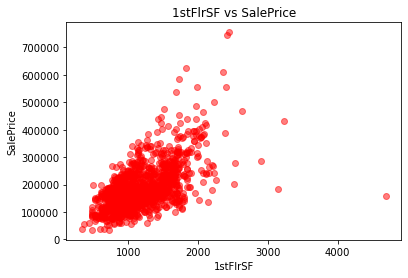

array([[1.        , 0.60585218],
       [0.60585218, 1.        ]])

In [78]:
#olumns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
first_coef = np.corrcoef(data['1stFlrSF'],data.SalePrice)
plt.scatter(data['1stFlrSF'],data.SalePrice,c = "r", alpha = 0.5)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('1stFlrSF vs SalePrice')
plt.show()
first_coef

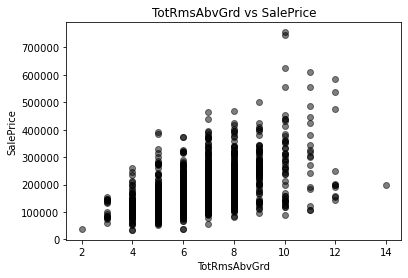

array([[1.        , 0.53372316],
       [0.53372316, 1.        ]])

In [79]:
room_coef = np.corrcoef(data.TotRmsAbvGrd, data.SalePrice)
plt.scatter(data.TotRmsAbvGrd, data.SalePrice, c = "k", alpha = 0.5)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title('TotRmsAbvGrd vs SalePrice')
plt.show()
room_coef

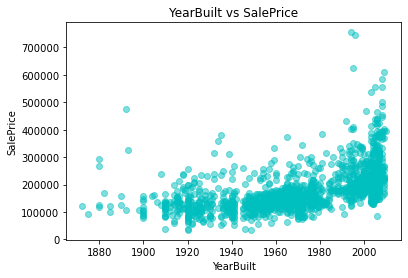

array([[1.        , 0.52289733],
       [0.52289733, 1.        ]])

In [80]:
year_coef = np.corrcoef(data.YearBuilt, data.SalePrice)
plt.scatter(data.YearBuilt,data.SalePrice, c = "c", alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('YearBuilt vs SalePrice')
plt.show()
year_coef

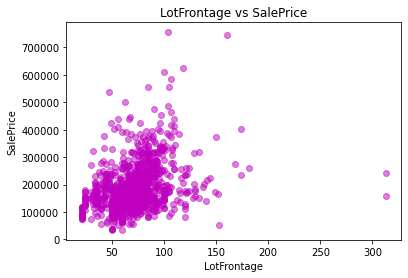

array([[nan, nan],
       [nan,  1.]])

In [81]:
front_coef = np.corrcoef(data.LotFrontage, data.SalePrice)
plt.scatter(data.LotFrontage, data.SalePrice, c = "m", alpha = 0.5)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('LotFrontage vs SalePrice')
plt.show()
front_coef

In [82]:
def regresion_lineal(x, y, epoch, iec, a = 0.1): # iec-> imprimir error cada
    # Inicializar los betas
    b0 = 100
    b1 = 100
    resultados = {} # Disccionario de resultados
    errores = {} # Diccionario de errores
    dic_b0 = {}
    dic_b1 = {}
    for i in range(1, epoch + 1):
        y_s = b0 + b1 * x #cálculo de y estimado
        resultados[i] = y_s

        e = ((y - y_s) ** 2).sum()/(2 * y.count()) # cálculo del error
        errores[i] = e

        if(i % iec == 0): #Imprimir el error cada iec
            print(i, ". El error es: ", e)
        
        gb0 = ((y_s - y).sum())/y_s.count() #Gradinete de b0
        gb1 = (((y_s - y) * x).sum())/y_s.count() # Gradiente de b1
        
        b0 = b0 - a * gb0 #nb0        
        b1 = b1 - a * gb1 #nb1

        dic_b0[i] = b0
        dic_b1[i] = b1
    return resultados, errores, dic_b0, dic_b1

In [83]:
def graf_errores(errores, aux = 100):
    for i in range(1, len(errores)):
        if(i % aux == 0):
            plt.scatter(i, errores[i])
    plt.xlabel('# de iteración')
    plt.ylabel('Valor del Error')
    plt.title('Gráfica de Errores')
    return plt.show()

In [84]:
def graf_betas(b0, b1):
    plt.plot(b0.keys(), b0.values(), label = "B0", linewidth = '2.5')
    #plt.text(len(dic_b0), dic_b0[len(dic_b0)], 'B0'+str(dic_b0[len(dic_b0)]))
    plt.plot(b1.keys(), b1.values(), label = "B1", linewidth = '2.5')
    plt.legend()
    plt.xlabel('# de iteración')
    plt.ylabel('Valor de beta')
    plt.title('Gráfica de B1 y B2')
    
    return plt.show()

In [85]:
def graf_resultados(x, y, resultados, n):
    plt.scatter(x, y, label = 'train', alpha = 0.5, color = 'lightgrey')
    for i in range(1, len(resultados)+1):
        if(i % n == 0):
            plt.plot(x, resultados[i], label = i)
    plt.legend()
    return plt.show

In [86]:
resultados, errores, dic_b0, dic_b1 = regresion_lineal(train['OverallQual'], train['SalePrice'], 4000, 1000, 0.0099)

1000 . El error es:  1199378756.7418053
2000 . El error es:  1144773339.717677
3000 . El error es:  1123229831.9676828
4000 . El error es:  1114730259.0046382


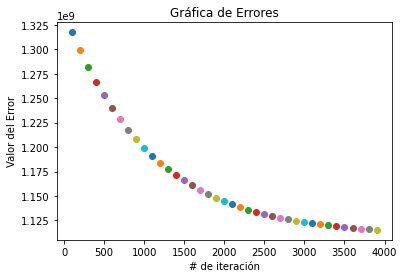

In [87]:
graf_errores(errores, 100)

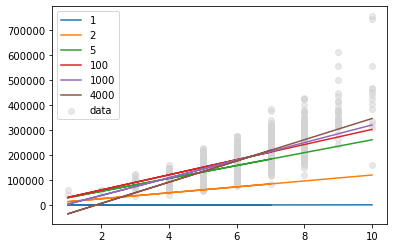

In [88]:
plt.scatter(train['OverallQual'], train['SalePrice'], label = 'data', alpha=0.5, color='lightgrey')
plt.plot(train['OverallQual'], resultados[1], label = 1)
plt.plot(train['OverallQual'], resultados[2], label = 2)
plt.plot(train['OverallQual'], resultados[5], label = 5)
plt.plot(train['OverallQual'], resultados[100], label = 100)
plt.plot(train['OverallQual'], resultados[1000], label = 1000)
plt.plot(train['OverallQual'], resultados[4000], label = 4000)
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

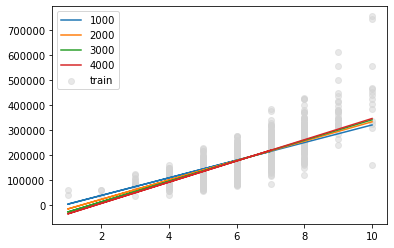

In [89]:
graf_resultados(train['OverallQual'], train['SalePrice'], resultados, 1000)

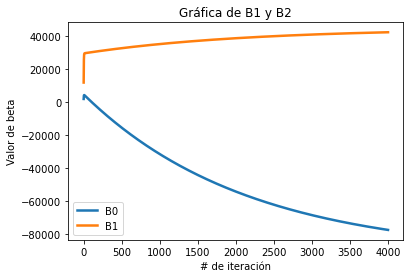

In [90]:
graf_betas(dic_b0, dic_b1)